<a href="https://colab.research.google.com/github/Haris-09/Python-Programming/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
data1 = pd.Series([23, 45, 78, 1234, 90, 78, 56, 45])
data1.describe()

,0
count,8.000000
mean,206.125000
std,415.905016
min,23.000000
25%,45.000000
50%,67.000000
75%,81.000000
max,1234.000000


In [2]:
import pandas as pd
data = pd.Series([23, 45, 78, 90, 78, 56, 45])
data.describe()

,0
count,7.000000
mean,59.285714
std,23.732638
min,23.000000
25%,45.000000
50%,56.000000
75%,78.000000
max,90.000000


In [8]:
Q1 = data1.quantile(0.25)
Q2 = data1.quantile(0.50)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data1[(data1 < lower_bound) | (data1 > upper_bound)]
print(Q1)
print(Q2)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)
print(outliers)

45.0
67.0
81.0
36.0
-9.0
135.0
3    1234
dtype: int64


In [9]:
outliers = []
outliers.append(data1[data1 < lower_bound])
outliers.append(data1[data1 > upper_bound])
print(outliers)

[Series([], dtype: int64), 3    1234
dtype: int64]


In [11]:
data2 = data1[(data1>=lower_bound) & (data1<=upper_bound)]
print(data2)

0    23
1    45
2    78
4    90
5    78
6    56
7    45
dtype: int64


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd

file_path = '/content/drive/My Drive/NAVTCC: Data Science & AI' # Replace with your file path
bigmart = pd.read_csv(file_path+'/big_mart.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2654.864518
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1381.943893
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,438.547696
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2712.194204
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1235.254334


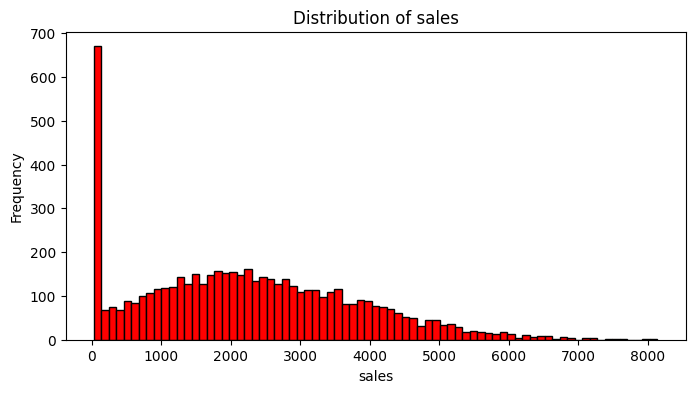

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
# for better distribution visualization taking the square root of length of sales column cast into int as bins parameter accepts int type
plt.hist(bigmart['sales'], bins=int(np.sqrt(len(bigmart['sales']))), color='red', edgecolor='black')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.title('Distribution of sales')
plt.show()

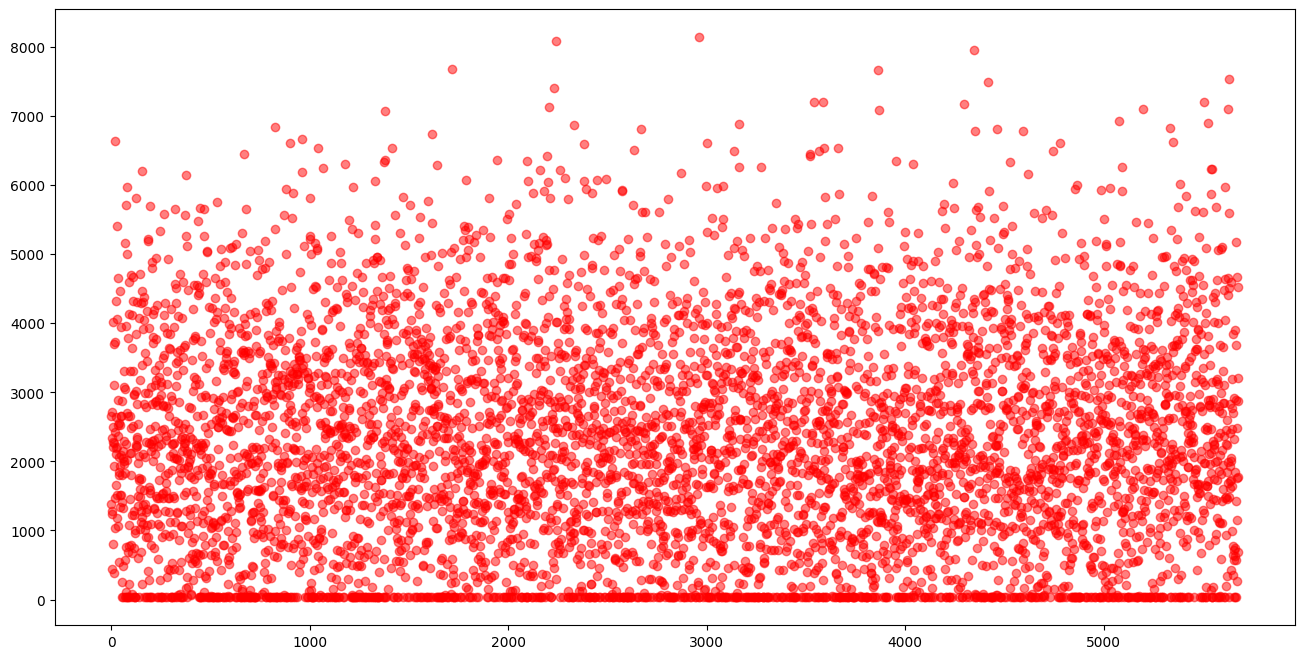

In [23]:
integers = range(len(bigmart.sales))
# for scatter plot x axis is ranged from 0 to length of sales
plt.figure(figsize=(16, 8))
plt.scatter(integers, bigmart.sales, c='red', alpha=0.5)

In [24]:
from scipy.stats import zscore
sales = bigmart.sales
print(sales)

0       2654.864518
1       1381.943893
2        438.547696
3       2712.194204
4       1235.254334
           ...     
5676    3210.615449
5677    2873.862039
5678    4519.965157
5679     688.153795
5680    1772.451867
Name: sales, Length: 5681, dtype: float64


The formula for calculating the z-score of a data point $x$ is:

$ z = \frac{x - \mu}{\sigma}  $

Where:

$x$ is the individual data point
$\mu$ is the mean of the dataset
$\sigma$ is the standard deviation of the dataset


In [25]:
sales_zscore = zscore(sales)
print(sales_zscore)

[ 0.25721125 -0.55989595 -1.16547639 ...  1.45444785 -1.00525042
 -0.30922292]


between -3 and +3 90% of data lies

In [27]:
sales[np.abs(sales_zscore)>=3]

,sales
1378,7070.757656
1718,7677.073980
2205,7130.742710
2229,7398.231442
2243,8080.963367
2964,8139.618270
3543,7206.256191
3588,7201.738593
3864,7666.846682
3868,7092.708302


In [28]:
len(sales[np.abs(sales_zscore)>=3])

17

In [30]:
bigmart_filtered = bigmart[np.abs(sales_zscore) < 3]
display(bigmart_filtered.head())
print(f"Original number of rows: {len(bigmart)}")
print(f"Number of rows after z-score: {len(bigmart_filtered)}")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2654.864518
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1381.943893
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,438.547696
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2712.194204
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1235.254334


Original number of rows: 5681
Number of rows after z-score: 5664
